In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_csv('../Datasets/air_traffic_data.csv')

In [3]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# Data Preparation:

### How can we handle missing values and anomalies in the dataset?
### What transformations are required to convert the Activity Piriod column into a more usabel formate? 

In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [5]:
df["Operating Airline IATA Code"].unique()

array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'MQ', 'OZ',
       'EV', '4T', 'BA', 'CX', 'CI', 'DL', 'BR', 'F9', 'HA', 'QX', 'FI',
       'DH', 'JL', 'KL', 'KE', 'LH', 'YV', 'MX', 'YX', 'NW', 'PR', 'SQ',
       'OO', 'SY', 'TA', 'US ', 'UA', 'VS', 'WS', nan, 'GL', 'QK', 'QF',
       'A8', 'NK', 'XP', 'EZ', 'AM', 'B6', 'XE', 'WN', 'VX', 'EI', 'G4',
       '9W', 'BBB', 'EK', 'XJ', 'WO', 'AB', 'RW', 'LX', 'LP', 'SE', 'MU',
       'SK', '5Y', 'CP', 'EY', 'CZ', 'TK', 'CM', 'AI'], dtype=object)

In [6]:
df["Published Airline IATA Code"].unique()

array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'OZ', 'DL',
       '4T', 'BA', 'CX', 'CI', 'BR', 'F9', 'HA', 'FI', 'DH', 'JL', 'KL',
       'KE', 'LH', 'US ', 'MX', 'YX', 'NW', 'PR', 'SQ', 'UA', 'SY', 'TA',
       'VS', 'WS', nan, 'GL', 'QF', 'A8', 'NK', 'XP', 'EZ', 'AM', 'B6',
       'WN', 'VX', 'EI', 'G4', '9W', 'BBB', 'EK', 'WO', 'AB', 'RW', 'LX',
       'LP', 'SE', 'MU', 'SK', '5Y', 'EY', 'CZ', 'TK', 'CM', 'AI'],
      dtype=object)

In [7]:
df.columns=df.columns.str.replace(' ','_',regex=True)

In [8]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [9]:
df['Operating_Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [10]:
df['Operating_Airline']=df['Operating_Airline'].str.replace('United Airlines - Pre 07/01/2013','United Airlines')

In [11]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [12]:
 df.Activity_Period=pd.to_datetime(df.Activity_Period,format='%Y%m')

In [13]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,2016-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,2016-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# Exploratory Data Analysis(EDA):

### What are the key statistics for passenger counts,and how are they distributed?
### Which regions(GEO Summary and GEO Region) have the highest and lowest passenger traffic?
### How do the different activity type (Deplaned,Enplaned,etc.) contributed to Passenger counts?


In [14]:
df['GEO_Region']=df['GEO_Region'].str.replace('Australia / Oceania','Oceania',regex=True)

In [15]:
df.GEO_Region.unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [16]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,2016-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,2016-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [17]:
df['Published_Airline'].unique()	

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines', 'Asiana Airlines',
       'Delta Air Lines', 'BelAir Airlines', 'British Airways',
       'Cathay Pacific', 'China Airlines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'US Airways',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines',
       'United Airlines - Pre 07/01/2013', 'Sun Country Airlines', 'TACA',
       'United Airlines', 'Virgin Atlantic', 'WestJet Airlines',
       'Boeing Company', 'Miami Air International', 'Qantas Airways',
       'Ameriflight', 'Spirit Airlines', 'Xtra Airways',
       'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', '

In [18]:
df['Published_Airline']=df['Published_Airline'].str.replace('United Airlines - Pre 07/01/2013','United Airlines',regex=True)

In [19]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,2016-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,2016-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [20]:
df.describe()

,Activity_Period,Passenger_Count,Adjusted_Passenger_Count,Year
count,15007,15007.000000,15007.000000,15007.000000
mean,2010-11-05 19:37:51.020190464,29240.521090,29331.917105,2010.385220
min,2005-07-01 00:00:00,1.000000,1.000000,2005.000000
25%,2008-03-01 00:00:00,5373.500000,5495.500000,2008.000000
50%,2010-11-01 00:00:00,9210.000000,9354.000000,2010.000000
75%,2013-08-01 00:00:00,21158.500000,21182.000000,2013.000000
max,2016-03-01 00:00:00,659837.000000,659837.000000,2016.000000
std,NaN,58319.509284,58284.182219,3.137589


In [21]:
aa=df.groupby('GEO_Region')['Passenger_Count'].sum().nlargest(5)
aa

GEO_Region
US        338141001
Asia       43972770
Europe     26646558
Canada     13865159
Mexico      7998587
Name: Passenger_Count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\1090933197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=aa.index,y=aa.values,palette='winter')


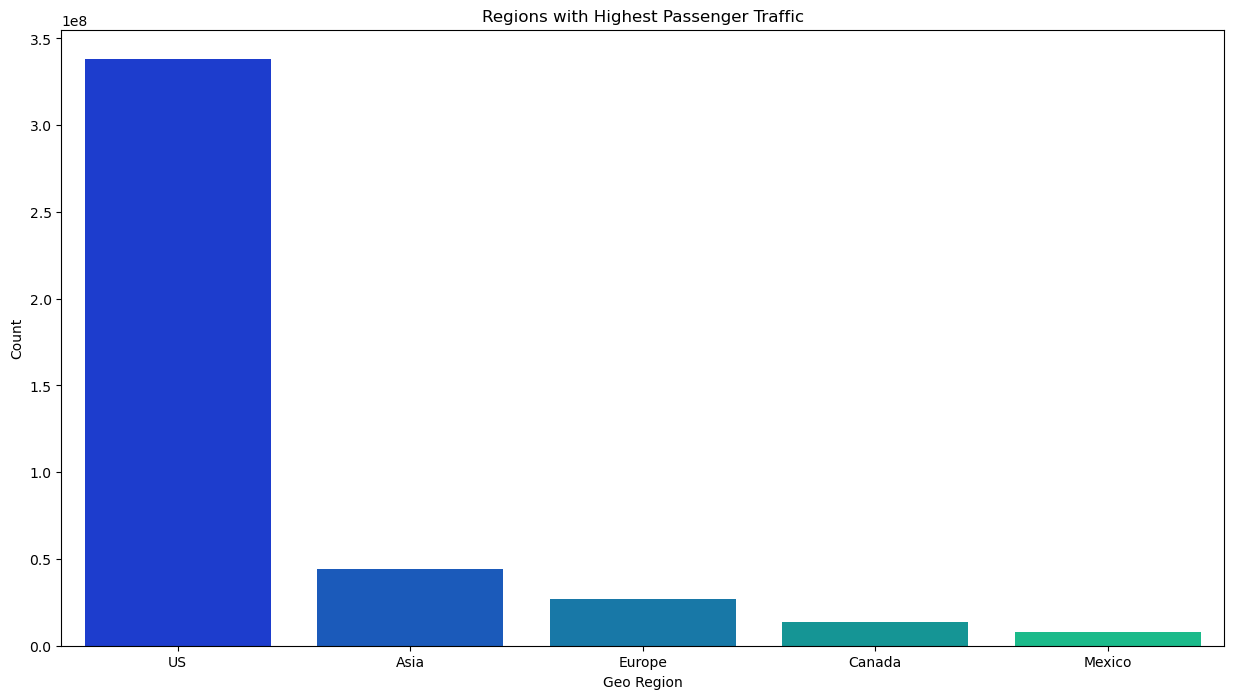

In [22]:
plt.figure(figsize=(15,8))
sb.barplot(x=aa.index,y=aa.values,palette='winter')
plt.title('Regions with Highest Passenger Traffic') 
plt.xlabel('Geo Region')
plt.ylabel('Count')
plt.show()

In [23]:
df.GEO_Summary.value_counts()

GEO_Summary
International    9210
Domestic         5797
Name: count, dtype: int64

In [24]:
bb=df.groupby('GEO_Region')['Passenger_Count'].sum().nsmallest(5)
bb

GEO_Region
South America       250741
Central America    1355400
Middle East        1852943
Oceania            4729341
Mexico             7998587
Name: Passenger_Count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\1700186900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=bb.index,y=bb.values,palette='winter')


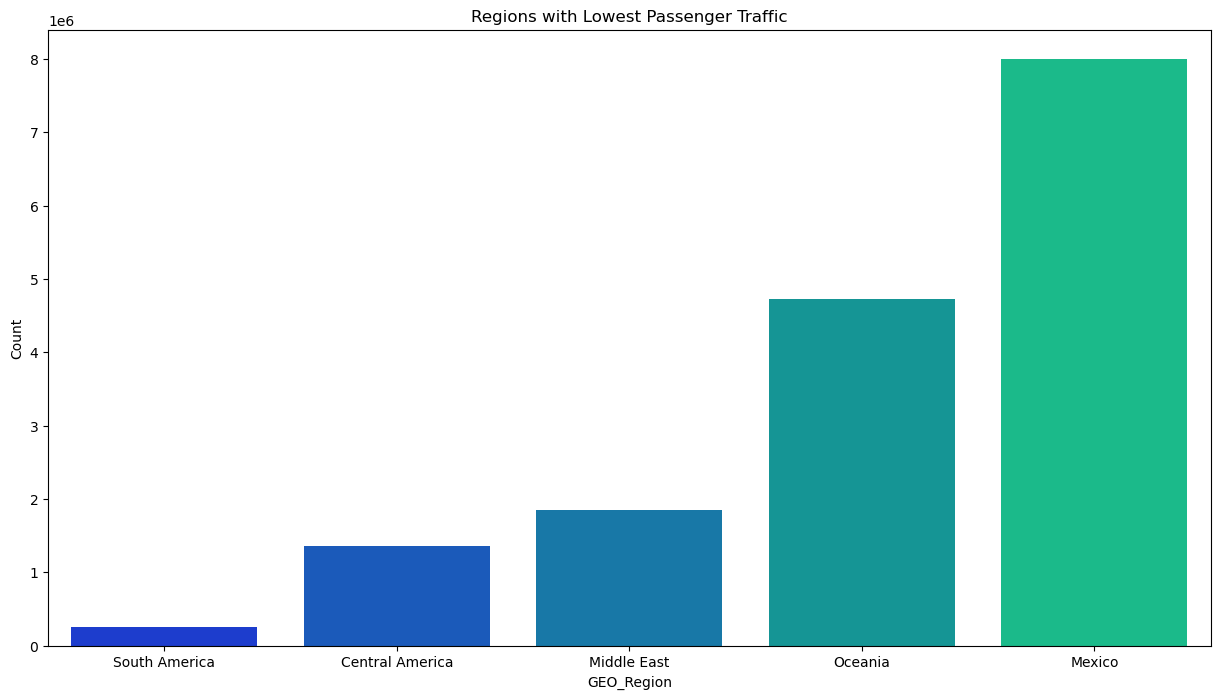

In [25]:
plt.figure(figsize=(15,8))
sb.barplot(x=bb.index,y=bb.values,palette='winter')
plt.title('Regions with Lowest Passenger Traffic')
plt.xlabel('GEO_Region')
plt.ylabel('Count')
plt.show()

In [26]:
a1=df.groupby('GEO_Region')['Passenger_Count'].mean()
a1

GEO_Region
Asia               13435.004583
Canada              9777.968265
Central America     4946.715328
Europe             12755.652465
Mexico              7173.620628
Middle East         8658.612150
Oceania             6417.016282
South America       2786.011111
US                 58330.343454
Name: Passenger_Count, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\3486262991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=a1.index,y=a1.values,palette='winter')


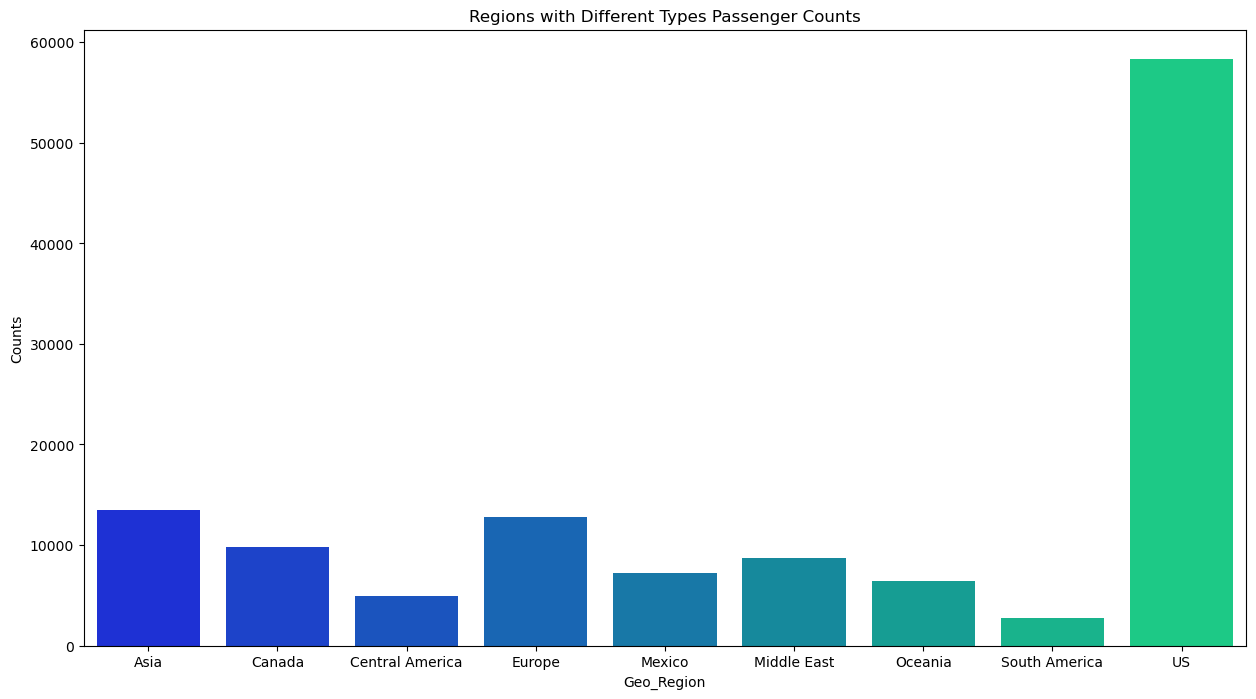

In [27]:
plt.figure(figsize=[15,8])
sb.barplot(x=a1.index,y=a1.values,palette='winter')
plt.title('Regions with Different Types Passenger Counts')
plt.xlabel('Geo_Region')
plt.ylabel('Counts')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\2202364445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df.Activity_Type_Code,y=df.Passenger_Count,palette='winter')


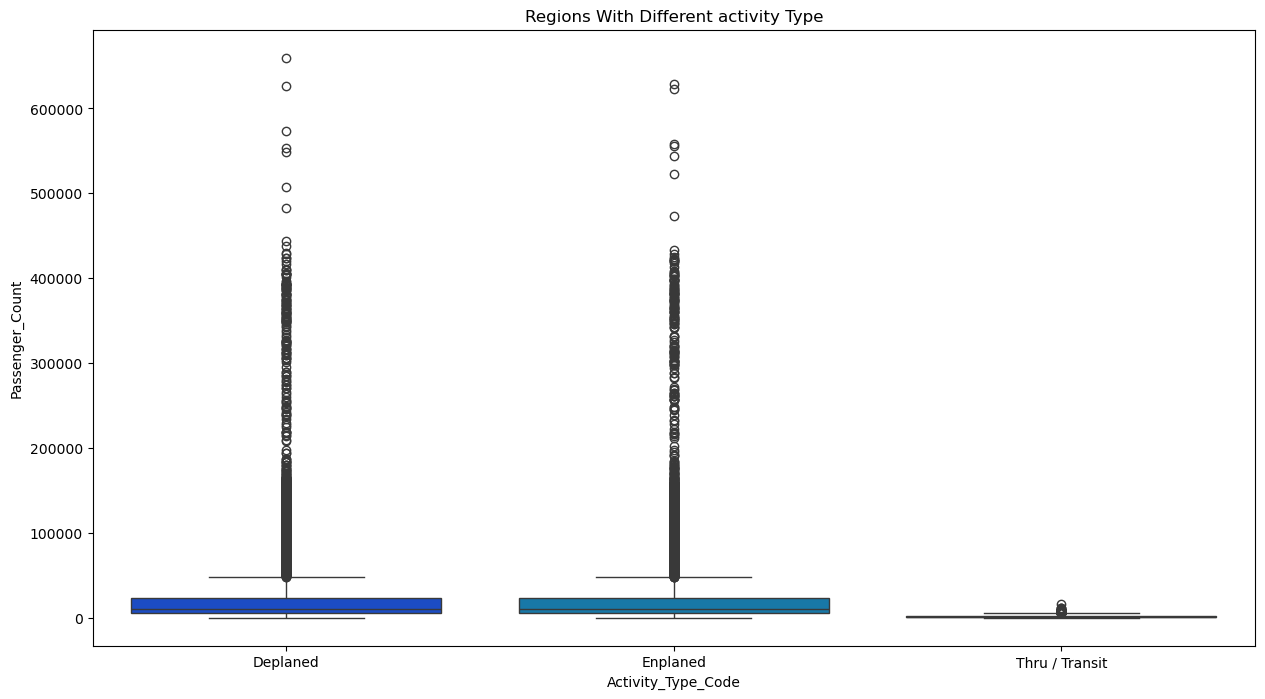

In [28]:
plt.figure(figsize=[15,8])
sb.boxplot(x=df.Activity_Type_Code,y=df.Passenger_Count,palette='winter')
plt.title('Regions With Different activity Type')
plt.xlabel('Activity_Type_Code')
plt.ylabel('Passenger_Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\3008825538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=a1.index,y=a1.values,palette='winter')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\3008825538.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=bb.index,y=bb.values,palette='winter')


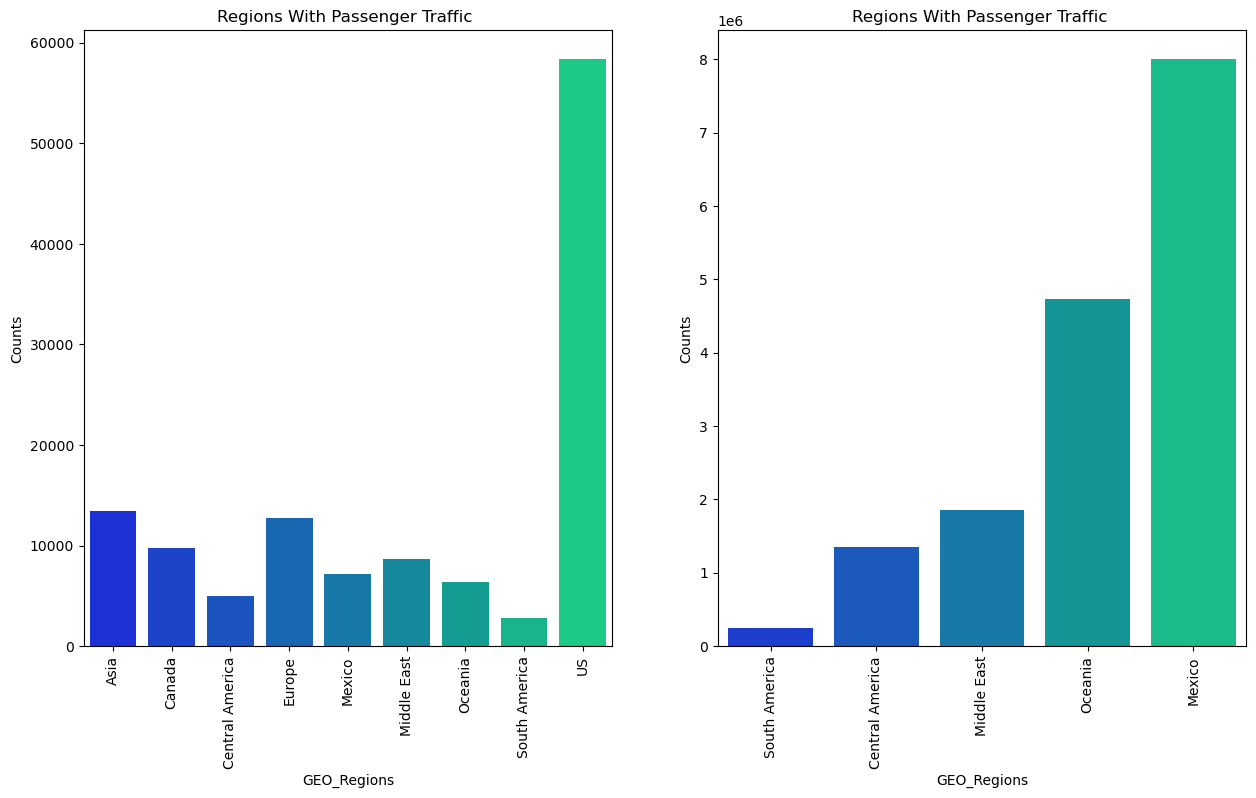

In [29]:
f=plt.figure(figsize=[15,8])

plt.subplot(121)
sb.barplot(x=a1.index,y=a1.values,palette='winter')
plt.title('Regions With Passenger Traffic ')
plt.xlabel('GEO_Regions')
plt.ylabel('Counts')
plt.xticks(rotation=90)

plt.subplot(122)
sb.barplot(x=bb.index,y=bb.values,palette='winter')
plt.title('Regions With Passenger Traffic ')
plt.xlabel('GEO_Regions')
plt.ylabel('Counts')
plt.xticks(rotation=90)

plt.show()

# Temporal Analysis:

### How has passenger traffic evolved over the years and months?
### Are thire specific months or seosons that show peak or low passenger traffic?
### What trends can be identified from year-over-year passenger data?

In [30]:
c=pd.pivot_table(df,index='Year',columns='Month',values='Passenger_Count', aggfunc=sum)
c               

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\2876136569.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  c=pd.pivot_table(df,index='Year',columns='Month',values='Passenger_Count', aggfunc=sum)


Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2005,NaN,3195866.0,2671797.0,NaN,NaN,3225769.0,NaN,NaN,NaN,2617333.0,2770715.0,2740553.0
2006,2773293.0,3143839.0,2698200.0,2223024.0,2448889.0,3227605.0,3071396.0,2708778.0,2829000.0,2653887.0,2834959.0,2720100.0
2007,2869247.0,3436417.0,2903637.0,2304990.0,2507430.0,3382382.0,3263621.0,2820085.0,3056934.0,2922500.0,3129309.0,2957530.0
2008,3029021.0,3612297.0,2962937.0,2595676.0,2670053.0,3603946.0,3453751.0,3127387.0,3305954.0,2744485.0,3124451.0,3004720.0
2009,3024973.0,3650668.0,3074209.0,2359800.0,2644539.0,3649702.0,3419595.0,2925918.0,3177100.0,2971484.0,3249428.0,3191526.0
2010,3139059.0,3771842.0,3167124.0,2515361.0,2785466.0,3765824.0,3612886.0,3105958.0,3380355.0,3163659.0,3490100.0,3356365.0
2011,3200527.0,3917884.0,3441693.0,2610667.0,2883810.0,3935589.0,3766323.0,3129205.0,3547804.0,3326859.0,3602455.0,3564970.0
2012,3563007.0,4356216.0,3443039.0,2998119.0,3211600.0,4284443.0,4107195.0,3472440.0,3820570.0,3478890.0,3844987.0,3819379.0
2013,3604104.0,4347059.0,3814984.0,2966477.0,3204637.0,4176486.0,4146797.0,3593364.0,3933016.0,3466878.0,3910790.0,3781168.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\3577572556.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(x=df.Month,y=df.Passenger_Count,palette='winter')


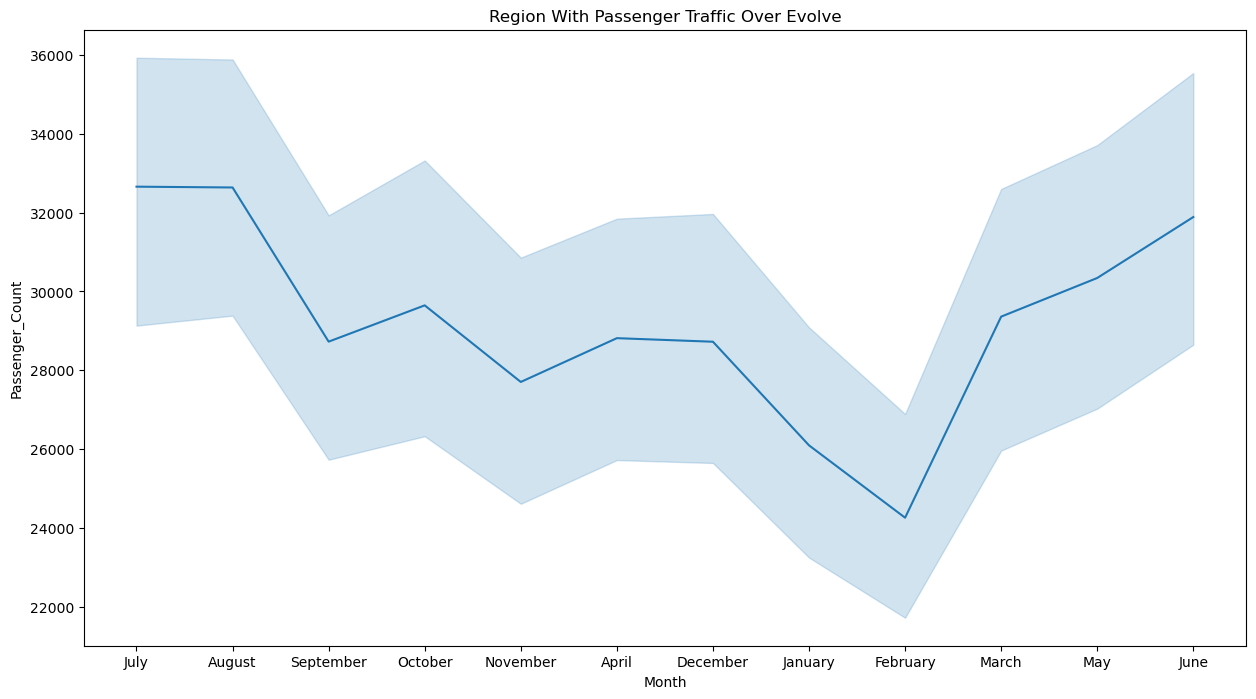

In [31]:
plt.figure(figsize=[15,8])
sb.lineplot(x=df.Month,y=df.Passenger_Count,palette='winter')
plt.title('Region With Passenger Traffic Over Evolve')
plt.xlabel('Month')
plt.ylabel('Passenger_Count')
plt.show()

#  Airline Analysis:

### Which airlines handle the highest and lowest number of passengers?
### How is passenger traffic distributed among different airlines?

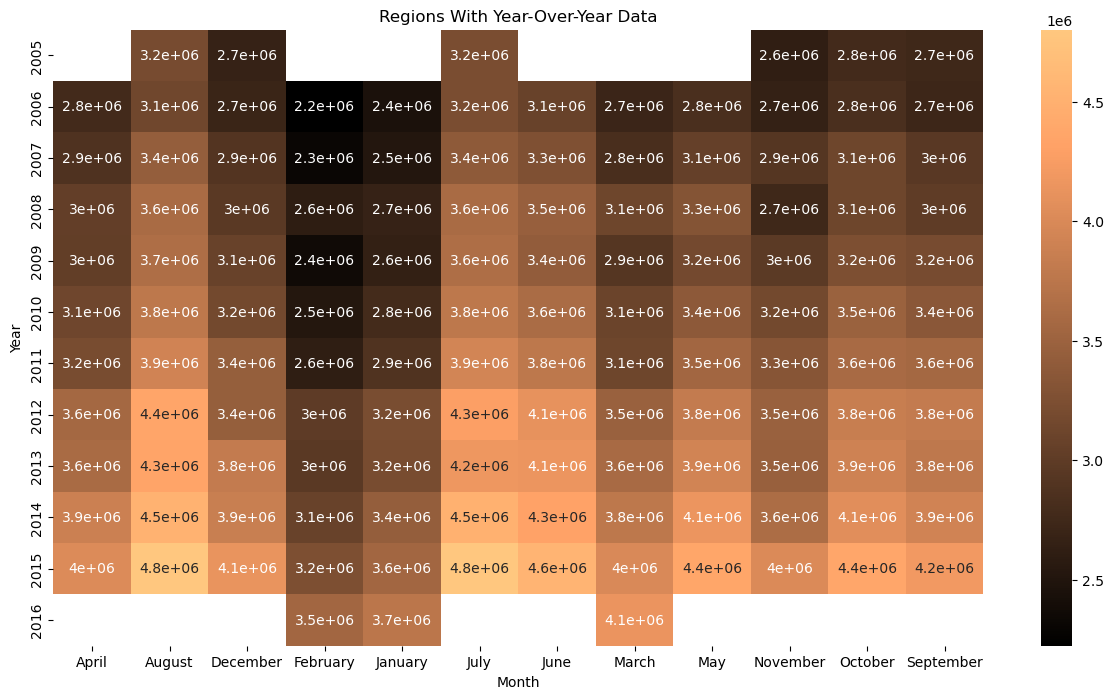

In [32]:
plt.figure(figsize=[15,8])
sb.heatmap(c,annot=True,cmap='copper')
plt.title('Regions With Year-Over-Year Data')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [33]:
df.groupby('Operating_Airline')['Passenger_Count'].sum().nlargest()

Operating_Airline
United Airlines      170240913
SkyWest Airlines      35711737
American Airlines     34588714
Virgin America        26934738
Delta Air Lines       26440420
Name: Passenger_Count, dtype: int64

In [34]:
df.groupby('Operating_Airline')['Passenger_Count'].sum().nsmallest()

Operating_Airline
Evergreen International Airlines      4
Boeing Company                       18
Atlas Air, Inc                       68
Ameriflight                         110
Xtra Airways                        146
Name: Passenger_Count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8444\4035615311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=df.Operating_Airline,y=df.Passenger_Count,palette='winter')


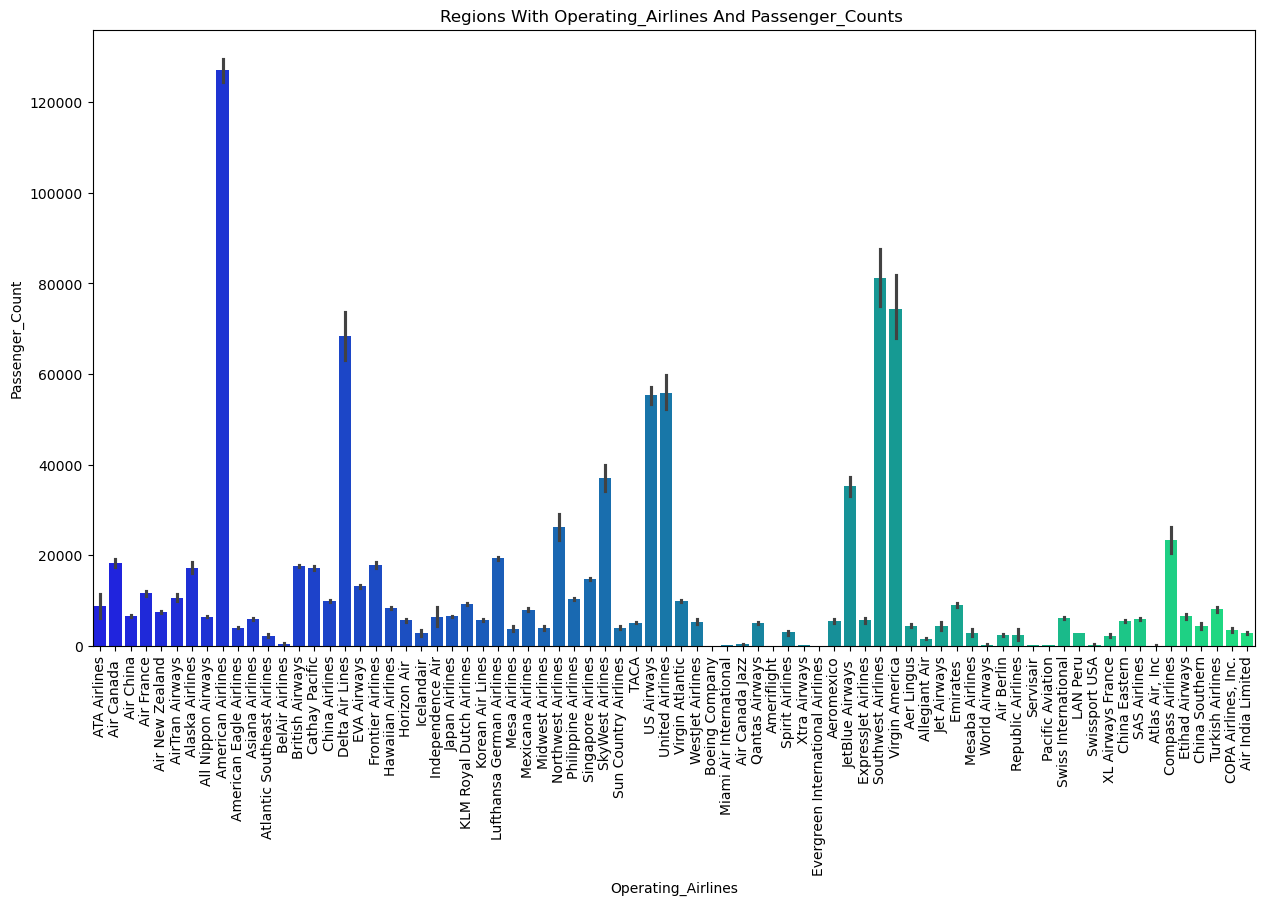

In [35]:
plt.figure(figsize=[15,8])
sb.barplot(x=df.Operating_Airline,y=df.Passenger_Count,palette='winter')
plt.title('Regions With Operating_Airlines And Passenger_Counts ')
plt.xlabel('Operating_Airlines')
plt.ylabel('Passenger_Count')
plt.xticks(rotation=90)
plt.show()

# Terminal and Boarding Area Analysis:

### Group data by Terminal and Boarding Area to analyze traffic distributions.
### Visualize comparisons using bar plots or pie chart.

In [36]:
df.groupby(['Terminal','Boarding_Area'])['Passenger_Count'].sum().sort_values()

Terminal       Boarding_Area
Other          Other                  200
Terminal 1     A                   409316
Terminal 2     D                 34060240
Terminal 3     E                 40886909
Terminal 1     C                 42271640
International  G                 57613844
               A                 57670570
Terminal 1     B                 67373108
Terminal 3     F                138526673
Name: Passenger_Count, dtype: int64

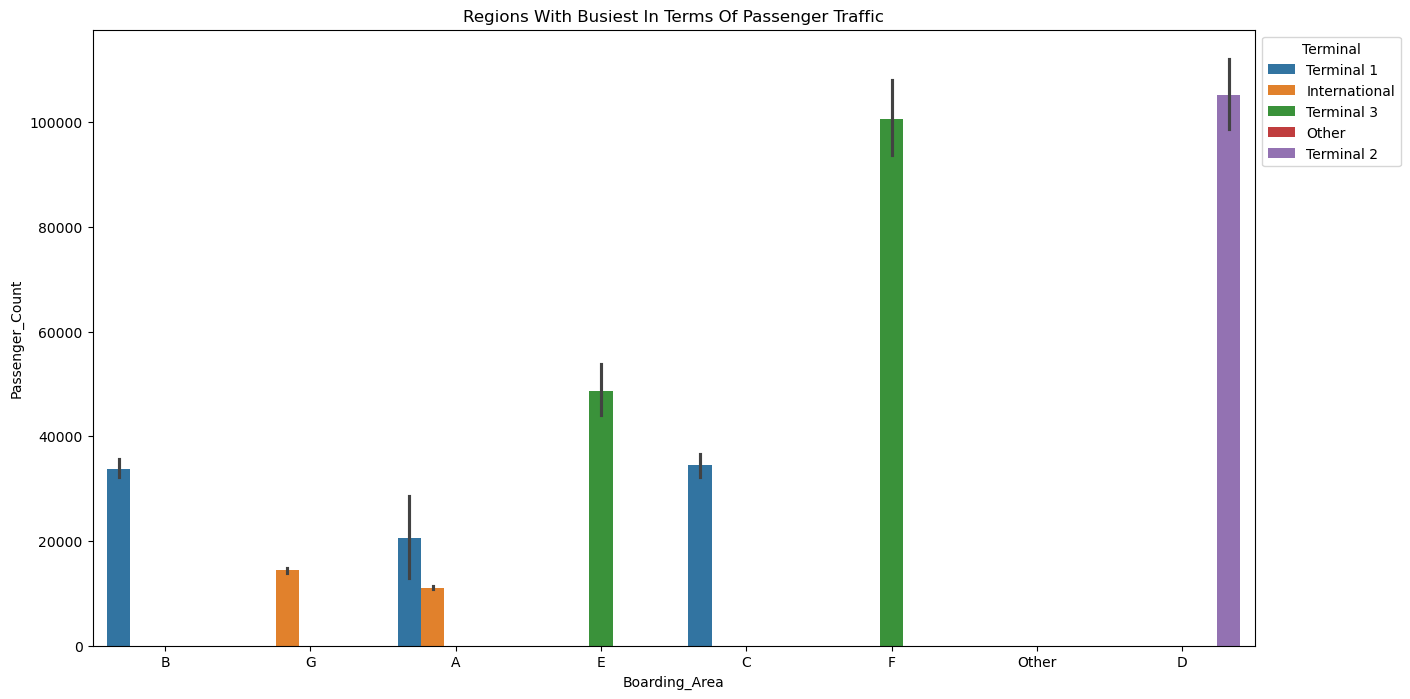

In [37]:
plt.figure(figsize=[15,8])
sb.barplot(x=df.Boarding_Area,y=df.Passenger_Count,hue=df.Terminal)
plt.legend(title='Terminal',bbox_to_anchor=(1.0,1.0))
plt.title('Regions With Busiest In Terms Of Passenger Traffic')
plt.xlabel('Boarding_Area')
plt.ylabel('Passenger_Count')
plt.show()
